<a href="https://colab.research.google.com/github/hanifabdihakimhani/Feature-Importance-Analysis-Model-Interpretation/blob/main/AS_DS33B_EC9_HanifAbdiHakimHani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Github Link

https://github.com/hanifabdihakimhani/Feature-Importance-Analysis-Model-Interpretation/blob/main/AS_DS33B_EC9_HanifAbdiHakimHani.ipynb

# Import Library

In [1]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042898 sha256=7b99595940374a27ae8fceca8824801ce2b1a9c78eeb6bcd1fa00c42c9dc5b03
  Stored in directory: /root/.cache/pip/wheels/cd/5e/ec/848120d5b913158656c0f8ef316233dd3356effa64aef19fba
Successfully built dalex


In [2]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6ec8050f0f13dfb5a14111bb05741279ce77e782378d377e5842546311e39ed3
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

import dalex as dx
from lime.lime_tabular import LimeTabularExplainer

# Load Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment/EC9/bank_churn_data.csv")

In [6]:
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Data Inspection

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [8]:
df.isna().sum()

,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


In [9]:
df['education_level'].isna().sum()

np.int64(0)

In [10]:
df = df.drop(['user_id'], axis = 1)

# EDA

## Churn Distribution

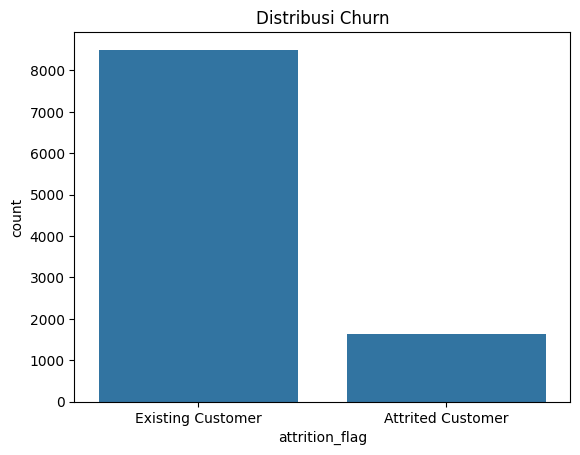

In [11]:
# Plot distribusi Churn
sns.countplot(x='attrition_flag', data=df)
plt.title("Distribusi Churn")
plt.show()

## Age Distribution

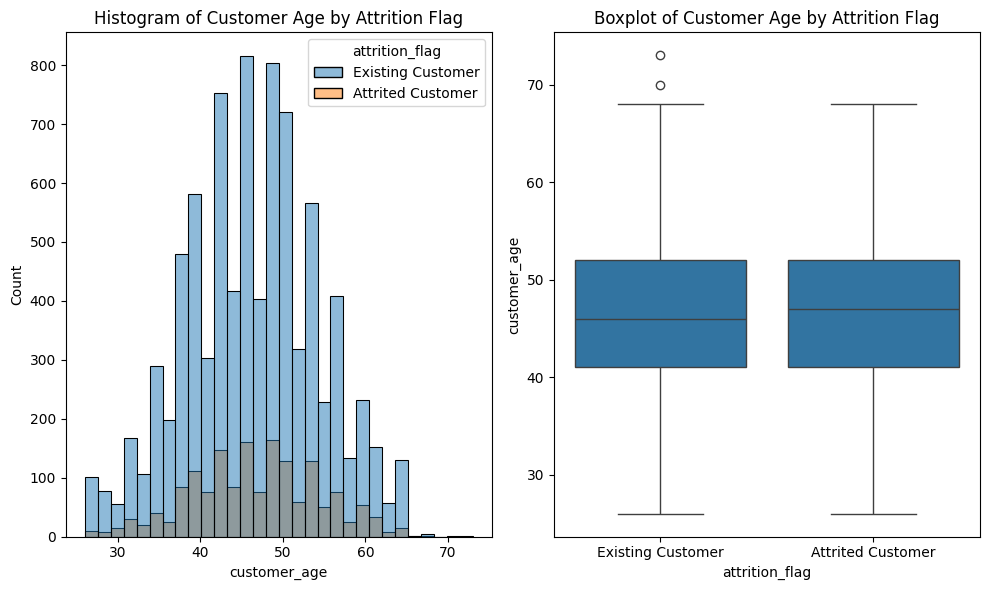

In [12]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='customer_age', hue='attrition_flag', bins=30, kde=False)
plt.title('Histogram of Customer Age by Attrition Flag')

plt.subplot(1, 2, 2)
sns.boxplot(x='attrition_flag', y='customer_age', data=df)
plt.title('Boxplot of Customer Age by Attrition Flag')

plt.tight_layout()
plt.show()

## Education and Income Correlation

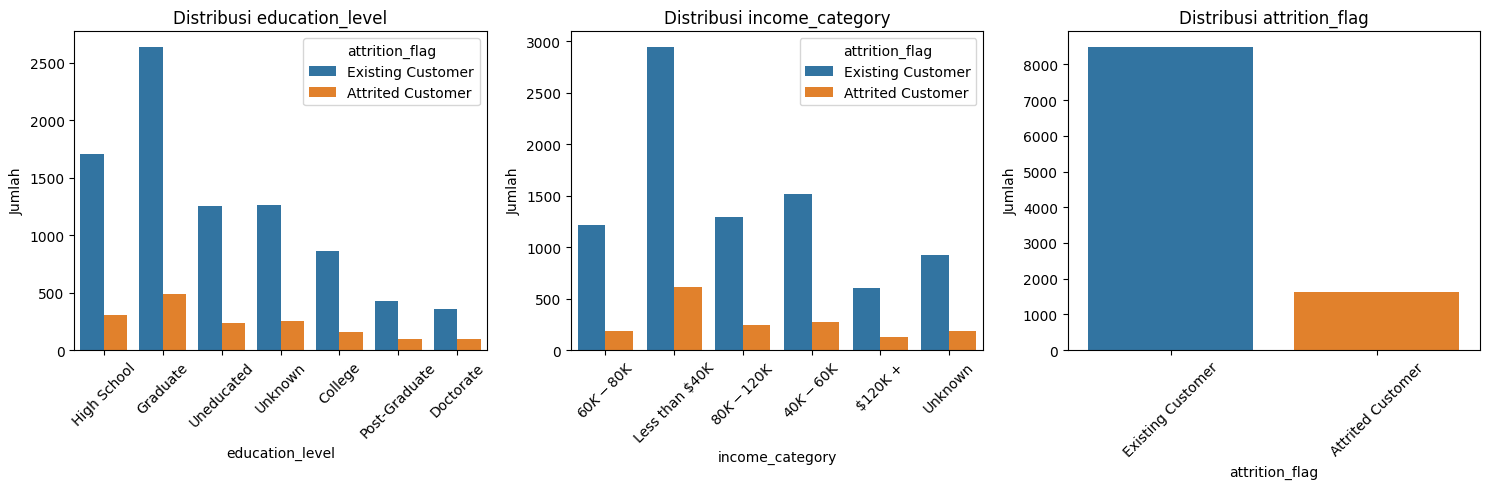

In [13]:
# Pilih fitur kategorikal
categorical_cols = ['education_level', 'income_category', 'attrition_flag']

cols_per_row = 3
rows = int(np.ceil(len(categorical_cols) / cols_per_row))

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 5 * rows))

axes = axes.flatten()

# Barplot untuk tiap fitur kategorikal
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='attrition_flag', data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [14]:
columns = ['education_level', 'income_category', 'attrition_flag']

chi2_matrix = pd.DataFrame(index=columns, columns=columns)

for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
            chi2_matrix.loc[col1, col2] = p
        else:
            chi2_matrix.loc[col1, col2] = 1

print(chi2_matrix)

                education_level income_category attrition_flag
education_level               1        0.036553       0.051489
income_category        0.036553               1       0.025002
attrition_flag         0.051489        0.025002              1


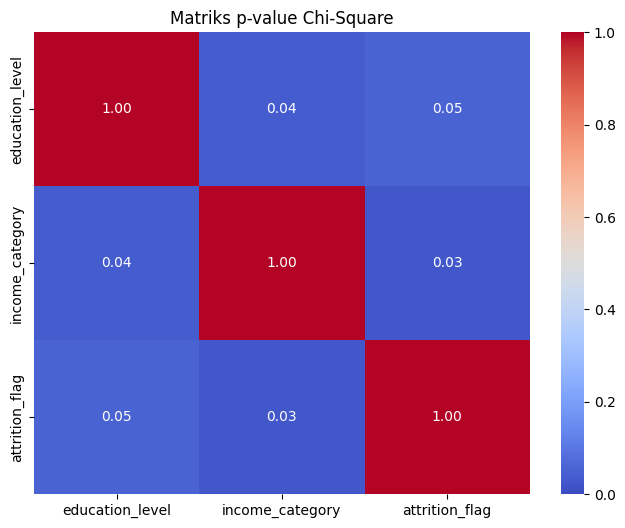

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(chi2_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)
plt.title("Matriks p-value Chi-Square")
plt.show()


## Gender

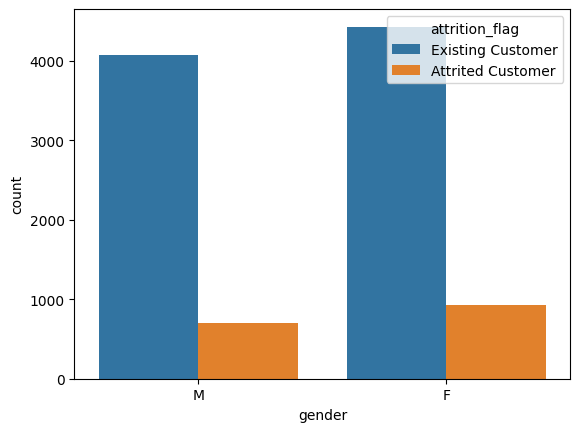

In [16]:
sns.countplot(x='gender', hue='attrition_flag', data=df)
plt.show()

# Machine Learning Model

## Train-Test Split

In [17]:
# cretate predictor variables as X
X = df.drop(['attrition_flag'], axis = 1)
# create target data as y
y = df['attrition_flag']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (8101, 19)
Testing set: (2026, 19)


In [18]:
df['card_category'].nunique()

4

## Encoding

In [19]:
cols_equal_to_2_unique = ['gender']
cols_more_than_2_unique = ['education_level', 'marital_status', 'income_category', 'card_category']

label_encoder = LabelEncoder()

### X Train Encode

In [20]:
for col in cols_equal_to_2_unique:
    X_train[col] = label_encoder.fit_transform(X_train[col])

X_train = pd.get_dummies(X_train, columns=cols_more_than_2_unique, drop_first=False)

X_train = X_train.astype(int)

### X Test Encode

In [21]:
for col in cols_equal_to_2_unique:
    X_test[col] = label_encoder.fit_transform(X_test[col])

X_test = pd.get_dummies(X_test, columns=cols_more_than_2_unique, drop_first=False)

X_test = X_test.astype(int)

### y train and y test Encode

In [22]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print(y_train, y_test)

[1 0 1 ... 1 1 1] [1 1 1 ... 1 1 1]


## Random Forest

In [23]:
rf_clf = RandomForestClassifier(random_state=42)

parameters = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True],
    'criterion': ['gini'],
    'class_weight': ['balanced']
}

rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall', n_jobs=-1, verbose=1)

rf_clf_gridcv.fit(X_train, y_train)

best_rf_model = rf_clf_gridcv.best_estimator_
best_rf_model

Fitting 5 folds for each of 16 candidates, totalling 80 fits


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=150,
                       random_state=42)

## XGBoost

In [24]:
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss')

parameters = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1],
    'scale_pos_weight': [1, 2]
}


xgb_clf_gridcv = GridSearchCV(xgb_clf, parameters, cv=5, scoring='recall', n_jobs=-1, verbose=1)

xgb_clf_gridcv.fit(X_train, y_train)

best_xgb_model = xgb_clf_gridcv.best_estimator_
best_xgb_model

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

## Evaluation

### Classification Report

In [25]:
# Random Forest
y_pred_rf = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       327
           1       0.97      0.96      0.97      1699

    accuracy                           0.95      2026
   macro avg       0.89      0.91      0.90      2026
weighted avg       0.95      0.95      0.95      2026



In [26]:
# XGBoost
y_pred_xgb = best_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.41      0.58       327
           1       0.90      1.00      0.95      1699

    accuracy                           0.90      2026
   macro avg       0.95      0.70      0.76      2026
weighted avg       0.91      0.90      0.89      2026



### Confusion Matriks


Confusion Matrix:
[[ 277   50]
 [  61 1638]]


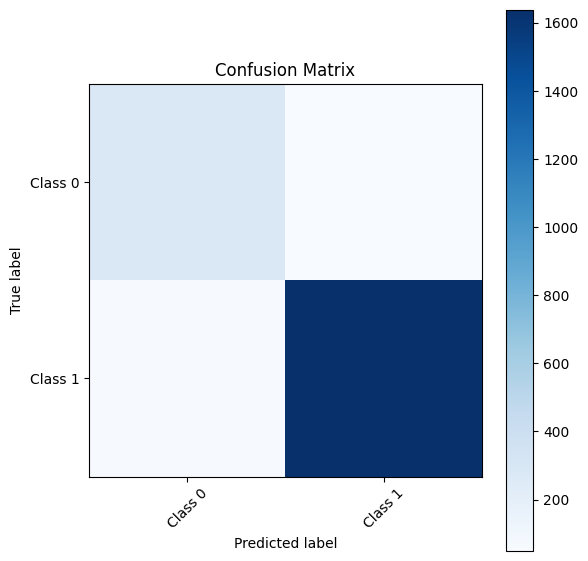

In [27]:
# Random Forest
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

plt.figure(figsize=(6,6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = ['Class 0', 'Class 1']  # Ganti dengan nama kelas yang sesuai
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


Confusion Matrix:
[[ 134  193]
 [   1 1698]]


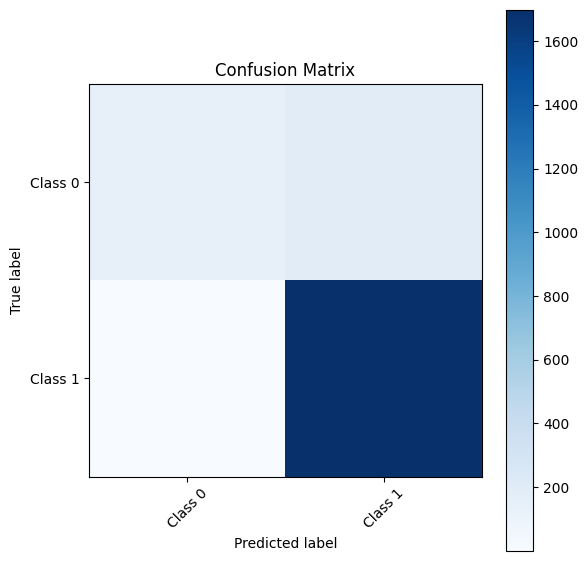

In [28]:
# XGBoost
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print(conf_matrix)

plt.figure(figsize=(6,6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = ['Class 0', 'Class 1']  # Ganti dengan nama kelas yang sesuai
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

## Cross Validation

In [29]:
# Random Forest
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='recall', n_jobs=-1, verbose=1)

print(f"Recall Scores for each fold: {cv_scores}")
print(f"Mean Recall: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Recall: {np.std(cv_scores):.4f}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Recall Scores for each fold: [0.96546657 0.95735294 0.97058824 0.96764706 0.96838235]
Mean Recall: 0.9659
Standard Deviation of Recall: 0.0046


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished


# Model Agnostic Methods

In [30]:
## initiate explainer for Random Forest model
churn_rf_exp = dx.Explainer(best_rf_model, X_train, y_train, label = "RF Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8101 rows 36 cols
  -> target variable   : 8101 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7ceaf00c13a0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00999, mean = 0.771, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.728, mean = 0.0688, max = 0.962
  -> model_info        : package sklearn

A new explainer has been created!


## Permutation Feature Importance

In [31]:
# visualizr permutation feature importance for Random Forest Model
churn_rf_exp.model_parts().plot()

In [32]:
churn_rf_exp.model_parts()

,variable,dropout_loss,label
0,_full_model_,0.002921,RF Interpretation
1,avg_utilization_ratio,0.002921,RF Interpretation
2,card_category_Platinum,0.002931,RF Interpretation
3,card_category_Gold,0.002948,RF Interpretation
4,card_category_Silver,0.002974,RF Interpretation
5,marital_status_Unknown,0.002986,RF Interpretation
6,marital_status_Divorced,0.002993,RF Interpretation
7,education_level_Uneducated,0.003022,RF Interpretation
8,education_level_College,0.003026,RF Interpretation
9,card_category_Blue,0.003028,RF Interpretation


In [33]:
model_parts_result = churn_rf_exp.model_parts()
dropout_losses = model_parts_result.result[['variable', 'dropout_loss']]

# Menjumlahkan nilai `dropout_loss`
total_dropout_loss = dropout_losses['dropout_loss'].sum()
total_dropout_loss

np.float64(0.8790738596471307)

## Partial Dependent Plot

In [34]:
# create partial dependence plot of Random Forest model
churn_rf_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[26.   26.44 26.88 ... 69.12 69.56 70.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:   3%|▎         | 1/36 [00:00<00:06,  5.19it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.01 0.02 ... 0.98 0.99 1.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:   6%|▌         | 2/36 [00:00<00:06,  5.32it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:

## Local Interpretable Model-Agnostic Explanation

In [35]:
# define Random Forest explainer with lime module
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names = X_train.columns.tolist(),
    class_names = ['churn', 'retained'],
    discretize_continuous = True,
    verbose = True
)

In [36]:
user_id_23976 = X_train.iloc[0]
user_id_23976

,9066
customer_age,54
gender,0
dependent_count,1
months_on_book,36
total_relationship_count,1
months_inactive_12_mon,3
contacts_count_12_mon,3
credit_limit,3723
total_revolving_bal,1728
avg_open_to_buy,1995


In [37]:
y_pred_rf[0]

np.int64(1)

In [38]:
# explain Random Forest prediction for user_id: 23976
lime_explainer.explain_instance(user_id_23976, best_rf_model.predict_proba).show_in_notebook(show_table=True)

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning:

Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`

/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not 

Intercept 0.8059903133069719
Prediction_local [0.7764861]
Right: 0.9016800729196507


# Rekomendasi Bisnis


1. Kirimkan promosi untuk customer yang memiliki total transaksi dan jumlah transaki yang rendah.

2. Menawarkan customer untuk mencoba layanan atau produk baru untuk mengurangi attrition

3. Reach out kepada customer yang inactive setidaknya sebelum setahun (12 bulan) inactive agar kembali active untuk mengurangi resiko attrition